# Project 3 Web APIs & Classification

# Problem Statement

To build a classification model that can classifiy which of two subreddits, ([r/wow](https://www.reddit.com/r/wow) or [r/Overwatch](https://www.reddit.com/r/Overwatch/.json)), a particular post belongs to.

# Data collection

In [1]:
import requests
import time
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as sklm

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 500)

### Examine the Data

Examines the json from the World of Watcraft(wow) posts from reddit

In [3]:
url = 'https://www.reddit.com/r/wow/.json'

In [4]:
headers={'User-agent':'Loose Cannon 0.1'}

In [5]:
results = requests.get(url,headers=headers)

In [6]:
results.status_code

200

In [7]:
d_json=results.json()

Check the json for the keys and data.

In [8]:
d_json

{'kind': 'Listing',
 'data': {'modhash': '',
  'dist': 27,
  'children': [{'kind': 't3',
    'data': {'approved_at_utc': None,
     'subreddit': 'wow',
     'selftext': 'Good Morning r/wow! Welcome to the World First Race Megathread for Azshara\'s Eternal Palace.\n\nThreads related to the race will be consolidated into this one and comments will be sorted by new to foster discussion. Once Azshara\'s secret Kungen phase is over and a guild achieves world first, we\'ll leave this thread up for an hour or so before locking it and replacing it with a "World First Wrap-up" thread. The Wrap-up thread will serve as a place for continuing the World First discussion after a guild has secured the #1 spot. \n\nA thread congratulating the winning guild will be allowed outside of the main discussion stickies as usual, along with a separate one showing the kill video. \n\n**We ask that you remain civil and follow our [subreddit rules](https://www.reddit.com/r/wow/wiki/rules#wowbtn). Cheer for the gu

In [9]:
sorted(d_json.keys())

['data', 'kind']

In [10]:
d_json['kind']

'Listing'

In [11]:
d_json['data']

{'modhash': '',
 'dist': 27,
 'children': [{'kind': 't3',
   'data': {'approved_at_utc': None,
    'subreddit': 'wow',
    'selftext': 'Good Morning r/wow! Welcome to the World First Race Megathread for Azshara\'s Eternal Palace.\n\nThreads related to the race will be consolidated into this one and comments will be sorted by new to foster discussion. Once Azshara\'s secret Kungen phase is over and a guild achieves world first, we\'ll leave this thread up for an hour or so before locking it and replacing it with a "World First Wrap-up" thread. The Wrap-up thread will serve as a place for continuing the World First discussion after a guild has secured the #1 spot. \n\nA thread congratulating the winning guild will be allowed outside of the main discussion stickies as usual, along with a separate one showing the kill video. \n\n**We ask that you remain civil and follow our [subreddit rules](https://www.reddit.com/r/wow/wiki/rules#wowbtn). Cheer for the guild you most want to win but don\'

In [12]:
sorted(d_json['data'].keys())

['after', 'before', 'children', 'dist', 'modhash']

In [13]:
d_json['data']['after']

't3_chjhb7'

In [14]:
d_json['data']['before']

In [15]:
d_json['data']['dist']

27

In [16]:
d_json['data']['modhash']

''

In [17]:
d_json['data']['children']

[{'kind': 't3',
  'data': {'approved_at_utc': None,
   'subreddit': 'wow',
   'selftext': 'Good Morning r/wow! Welcome to the World First Race Megathread for Azshara\'s Eternal Palace.\n\nThreads related to the race will be consolidated into this one and comments will be sorted by new to foster discussion. Once Azshara\'s secret Kungen phase is over and a guild achieves world first, we\'ll leave this thread up for an hour or so before locking it and replacing it with a "World First Wrap-up" thread. The Wrap-up thread will serve as a place for continuing the World First discussion after a guild has secured the #1 spot. \n\nA thread congratulating the winning guild will be allowed outside of the main discussion stickies as usual, along with a separate one showing the kill video. \n\n**We ask that you remain civil and follow our [subreddit rules](https://www.reddit.com/r/wow/wiki/rules#wowbtn). Cheer for the guild you most want to win but don\'t resort to attacking people who cheer for an

In [18]:
d_json['data']['children'][0]['data']

{'approved_at_utc': None,
 'subreddit': 'wow',
 'selftext': 'Good Morning r/wow! Welcome to the World First Race Megathread for Azshara\'s Eternal Palace.\n\nThreads related to the race will be consolidated into this one and comments will be sorted by new to foster discussion. Once Azshara\'s secret Kungen phase is over and a guild achieves world first, we\'ll leave this thread up for an hour or so before locking it and replacing it with a "World First Wrap-up" thread. The Wrap-up thread will serve as a place for continuing the World First discussion after a guild has secured the #1 spot. \n\nA thread congratulating the winning guild will be allowed outside of the main discussion stickies as usual, along with a separate one showing the kill video. \n\n**We ask that you remain civil and follow our [subreddit rules](https://www.reddit.com/r/wow/wiki/rules#wowbtn). Cheer for the guild you most want to win but don\'t resort to attacking people who cheer for another guild.**\n\n----------\n

In [19]:
d_json['data']['children'][0]['data'].keys()

dict_keys(['approved_at_utc', 'subreddit', 'selftext', 'author_fullname', 'saved', 'mod_reason_title', 'gilded', 'clicked', 'title', 'link_flair_richtext', 'subreddit_name_prefixed', 'hidden', 'pwls', 'link_flair_css_class', 'downs', 'thumbnail_height', 'hide_score', 'name', 'quarantine', 'link_flair_text_color', 'author_flair_background_color', 'subreddit_type', 'ups', 'total_awards_received', 'media_embed', 'thumbnail_width', 'author_flair_template_id', 'is_original_content', 'user_reports', 'secure_media', 'is_reddit_media_domain', 'is_meta', 'category', 'secure_media_embed', 'link_flair_text', 'can_mod_post', 'score', 'approved_by', 'thumbnail', 'edited', 'author_flair_css_class', 'author_flair_richtext', 'gildings', 'post_hint', 'content_categories', 'is_self', 'mod_note', 'created', 'link_flair_type', 'wls', 'banned_by', 'author_flair_type', 'domain', 'allow_live_comments', 'selftext_html', 'likes', 'suggested_sort', 'banned_at_utc', 'view_count', 'archived', 'no_follow', 'is_cro

In [20]:
d_json['data']['children'][0]['data']['title']

"Azshara's Eternal Palace World First Race Megathread"

In [21]:
d_json['data']['children'][0]['data']['selftext']

'Good Morning r/wow! Welcome to the World First Race Megathread for Azshara\'s Eternal Palace.\n\nThreads related to the race will be consolidated into this one and comments will be sorted by new to foster discussion. Once Azshara\'s secret Kungen phase is over and a guild achieves world first, we\'ll leave this thread up for an hour or so before locking it and replacing it with a "World First Wrap-up" thread. The Wrap-up thread will serve as a place for continuing the World First discussion after a guild has secured the #1 spot. \n\nA thread congratulating the winning guild will be allowed outside of the main discussion stickies as usual, along with a separate one showing the kill video. \n\n**We ask that you remain civil and follow our [subreddit rules](https://www.reddit.com/r/wow/wiki/rules#wowbtn). Cheer for the guild you most want to win but don\'t resort to attacking people who cheer for another guild.**\n\n----------\n\n# See the full Progress\n\n[Wowprogress](https://www.wowpr

The reddit post contents can be accessed through d_json['data']['children']. Using the data keys 'title' and 'selftext' to extract information that can be used as the features.

In [22]:
d_json['data']['children'][0]['data']['name']

't3_cdx4za'

In [23]:
# Getting the wow posts.
wow_posts=[]
after=None
for num in range(40):
    print(num)
    if after == None:
        param={}
    else:
        param={'after':after}
    url = 'https://www.reddit.com/r/wow/.json'
    results = requests.get(url,params=param,headers=headers)
    if results.status_code==200:
        d_json=results.json()
        wow_posts.extend(d_json['data']['children'])
        after=d_json['data']['after']
    else:
        print(results.status_code)
        break
    time.sleep(2) #seconds to sleep

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [24]:
# Getting Overwatch posts
over_posts=[]
after=None
for num in range(40):
    print(num)
    if after == None:
        param={}
    else:
        param={'after':after}
    url = 'https://www.reddit.com/r/Overwatch/.json'
    results = requests.get(url,params=param,headers=headers)
    if results.status_code==200:
        d_json=results.json()
        over_posts.extend(d_json['data']['children'])
        after=d_json['data']['after']
    else:
        print(results.status_code)
        break
    time.sleep(2) #seconds to sleep

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


Checks for any duplicates in both reddit posts.

In [25]:
len(wow_posts)

987

In [26]:
# Check for unique posts
len(set([x['data']['name'] for x in wow_posts]))

987

In [27]:
len(over_posts)

978

In [28]:
# Check for unique posts
len(set([x['data']['name'] for x in over_posts]))

777

In [29]:
uni = len(set([x['data']['name'] for x in wow_posts])) + len(set([x['data']['name'] for x in over_posts]))
uni

1764

In [30]:
wow_text = [x['data']['selftext'] for x in wow_posts]
wow_titles = [x['data']['title'] for x in wow_posts]

over_text = [x['data']['selftext'] for x in over_posts]
over_titles = [x['data']['title'] for x in over_posts]

In [31]:
wow_df = pd.DataFrame({'text': wow_text,'title': wow_titles})
wow_df['target'] = 1

In [32]:
over_df = pd.DataFrame({'text': over_text,'title': over_titles})
over_df['target'] = 0

In [33]:
sample = pd.concat([wow_df, over_df])
sample.shape

(1965, 3)

In [34]:
pd.concat([wow_df, over_df]).to_csv('./all_data.csv')

In [35]:
sample.head()

,text,title,target
0,Good Morning r/wow! Welcome to the World First...,Azshara's Eternal Palace World First Race Mega...,1
1,Weekly healing thread.,Midweek Mending - Your Weekly Healing Thread,1
2,,i found this like 2 years ago and not a dungeo...,1
3,,The jump says it all,1
4,,"She was a bad bad Warchief. Punish her, Anduin!",1


In [36]:
df = pd.read_csv('./all_data.csv').drop(columns='Unnamed: 0')

In [37]:
df.shape

(1965, 3)

In [38]:
# Removes duplicate posts
df.drop_duplicates(keep='first', inplace=True)

In [39]:
df.shape

(1764, 3)

# Exploratory Data Analysis

We check what are the key words that are associated with posts from wow.

In [40]:
wow_df.head()

,text,title,target
0,Good Morning r/wow! Welcome to the World First...,Azshara's Eternal Palace World First Race Mega...,1
1,Weekly healing thread.,Midweek Mending - Your Weekly Healing Thread,1
2,,i found this like 2 years ago and not a dungeo...,1
3,,The jump says it all,1
4,,"She was a bad bad Warchief. Punish her, Anduin!",1


In [41]:
cvec = CountVectorizer(stop_words='english')

In [42]:
X_title = cvec.fit_transform(wow_df.title)

In [43]:
sum_words = X_title.sum(axis=0)

In [44]:
words_freq = [(word, sum_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

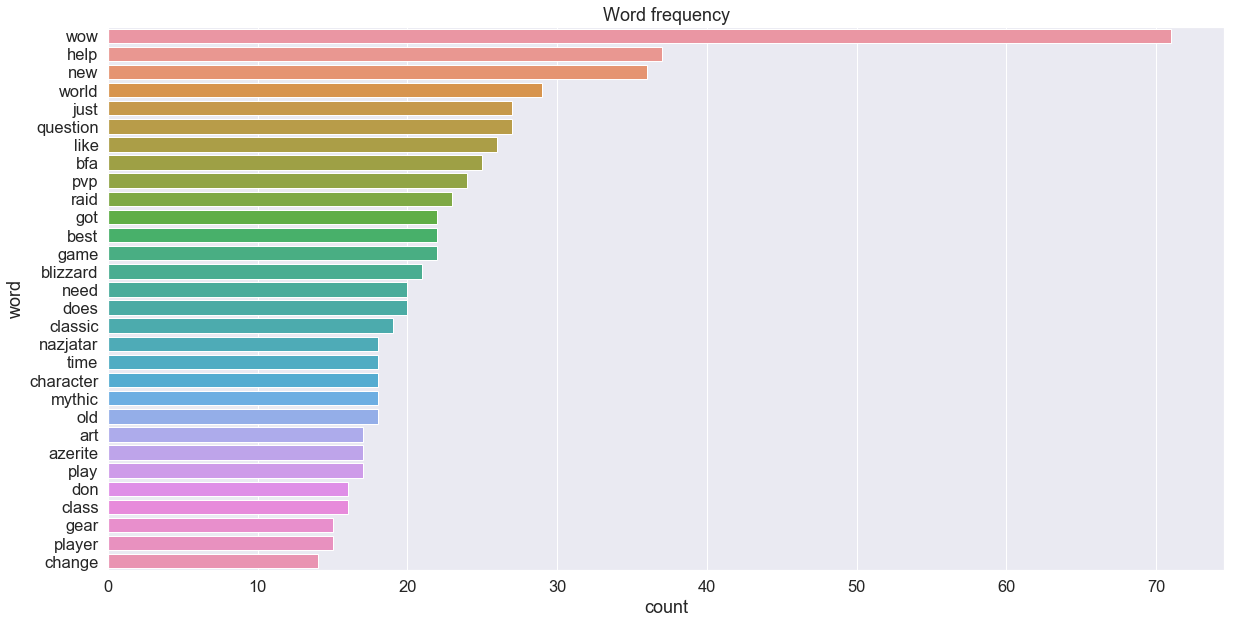

In [45]:
plt.figure(figsize = (20,10))
sns.set(font_scale=1.5)

sns.barplot(data =pd.DataFrame(words_freq,
                               columns = ['word' , 'count']).nlargest(30, 'count').sort_values('count',ascending=False),
                                x='count',y='word').set_title("Word frequency");


The word wow comes out often which is expected as it is the abbreivated name of the game. 

Examines post from overwatch

In [46]:
over_df.head()

,text,title,target
0,In this thread you can ask all kinds of questi...,"Weekly Quick Questions Thread - July 25, 2019",0
1,,One of my favorite things about Sigma is just ...,0
2,,Sigma Ult To Flank From Under The Map,0
3,"Now, I know, the head is almost always the cri...",Make Sigma’s feet his critbox instead of his head,0
4,,"Ashe's Dynamite is a hookable entity, I guess",0


In [47]:
cvec = CountVectorizer(stop_words='english')

In [48]:
X_title = cvec.fit_transform(over_df.title)

In [49]:
sum_words = X_title.sum(axis=0)

In [50]:
words_freq = [(word, sum_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

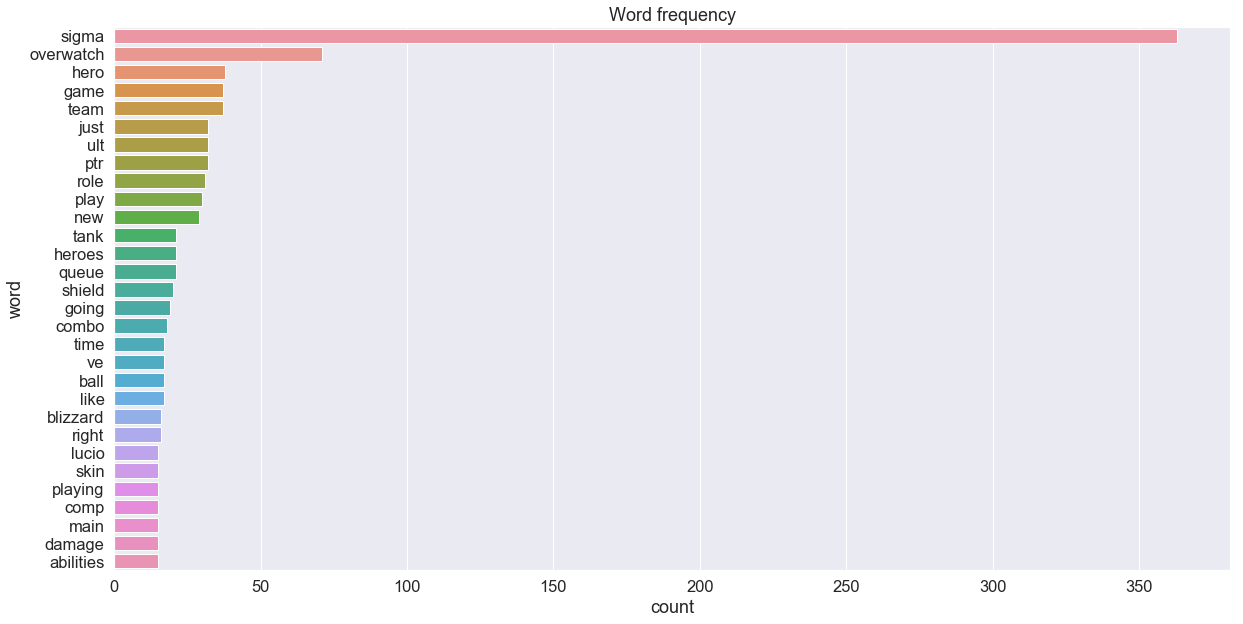

In [51]:
plt.figure(figsize = (20,10))
sns.set(font_scale=1.5)

sns.barplot(data =pd.DataFrame(words_freq,
                               columns = ['word' , 'count']).nlargest(30, 'count').sort_values('count',ascending=False),
                                x='count',y='word').set_title("Word frequency");


The top words from the two posts are relatively different.

### Now we check if the datasets have any nulls values.

In [52]:
df.isnull().sum()

text      707
title       0
target      0
dtype: int64

We find the column 'text' contains alot of null values. we will not use this feature.

In [53]:
df.target.value_counts()

1    987
0    777
Name: target, dtype: int64

In [54]:
df.head()

,text,title,target
0,Good Morning r/wow! Welcome to the World First...,Azshara's Eternal Palace World First Race Mega...,1
1,Weekly healing thread.,Midweek Mending - Your Weekly Healing Thread,1
2,NaN,i found this like 2 years ago and not a dungeo...,1
3,NaN,The jump says it all,1
4,NaN,"She was a bad bad Warchief. Punish her, Anduin!",1


In [55]:
df.to_csv('./data.csv')

### Modeling

The models used are Naive Bayes classifier, KNN, logistic regression.
The scores will be based on the default parameters.
A separate notebook is used to perform a gridsearch on the parameters.
The feature 'title' is used for the models.

In [56]:
df = pd.read_csv('./data.csv').drop(columns='Unnamed: 0')

In [57]:
df.head()

,text,title,target
0,Good Morning r/wow! Welcome to the World First...,Azshara's Eternal Palace World First Race Mega...,1
1,Weekly healing thread.,Midweek Mending - Your Weekly Healing Thread,1
2,NaN,i found this like 2 years ago and not a dungeo...,1
3,NaN,The jump says it all,1
4,NaN,"She was a bad bad Warchief. Punish her, Anduin!",1


In [58]:
# Using title as the feature.
X = df['title']
y = df.target

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    stratify=y)

In [60]:
# Defining the classifiers
classifiers={'NB':MultinomialNB(),'KNN':KNeighborsClassifier(),'lr':LogisticRegression()}

In [61]:
# Defining the transformers
transformers={'CV':CountVectorizer(),
              'HV':HashingVectorizer(non_negative=True),
              'Tfidf':TfidfVectorizer()}

In [62]:
for c,classifier in classifiers.items():
    for t,transformer in transformers.items():    
        pipe = make_pipeline(transformer, classifier) 
        pipe = pipe.fit(X_train, y_train)               
        y_pred = pipe.predict(X_test)
        print(c,t)
        print("Train model score: {}" .format(pipe.score(X_train, y_train)))  
        print("Test model score: {}" .format(pipe.score(X_test, y_test)))        

NB CV
Train model score: 0.9788359788359788
Test model score: 0.8571428571428571
NB HV
Train model score: 0.9168556311413454
Test model score: 0.8117913832199547
NB Tfidf
Train model score: 0.9727891156462585
Test model score: 0.8480725623582767


D:\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:102: De

KNN CV
Train model score: 0.8374905517762661
Test model score: 0.7029478458049887
KNN HV


D:\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:102: De

Train model score: 0.8647014361300076
Test model score: 0.7551020408163265
KNN Tfidf
Train model score: 0.871504157218443
Test model score: 0.7755102040816326
lr CV
Train model score: 0.9871504157218443
Test model score: 0.8140589569160998


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


lr HV
Train model score: 0.8994708994708994
Test model score: 0.8140589569160998
lr Tfidf
Train model score: 0.9357520786092215
Test model score: 0.8299319727891157


D:\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


From the scores, we can see that Naive Bayes classifier with countvectorizer produce the best score.
The confusion matrix will be used to examine the Naive Bayes. We will use grid search CV for the Naive Bayes model in a separate Notebook.

In [63]:
pipe = make_pipeline(CountVectorizer(), MultinomialNB()) 
pipe = pipe.fit(X_train, y_train)               
y_pred = pipe.predict(X_test)
        
print("Train model score: {}" .format(pipe.score(X_train, y_train)))  
print("Test model score: {}" .format(pipe.score(X_test, y_test)))        

Train model score: 0.9788359788359788
Test model score: 0.8571428571428571


Examines the true positives and negatives, false positives and negatives

In [64]:
tn, fp, fn, tp = sklm.confusion_matrix(y_test, y_pred).ravel()

In [65]:
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 155
False Positives: 39
False Negatives: 24
True Positives: 223


Examines the posts that are inaccurately classified.

In [66]:
count=0
for x,test in zip(y_pred,y_test.index):
    if x != y_test[test]:
        if x==1: # Look for False positives
            print(X_test[test])
            count=count+1
print('Number of False positives: {}'.format(count))

Wait what?
A small effort by me
What level do I have to get to to unlock everything?
A Junkrat Hiding in the Sewers Saves the Day!
When in doubt, swing randomly
Is there a video or post that explains the entirety of the overarching story?
How To Deal With Toxic People
Muh Stuns!!
Yeah no easter egg here :(
Sig’s Character design
Weekly Trash Talk Thread - July 23, 2019
[HELP] I set my profile to Public... except it isn't.
Best way to introduce a friend to the game?
Every time a DPS player gives credit to support, an angel gets their wings.
Can we play normal gamemodes in third person ?
Aussie player looking for teammates to play comp with.
Oppinions
My entire sub box :/
A fast win that my friend and I did a little while ago on No Limit...
Fly Orisa, Fly!!
My hands are still shaky from the intensity of this round!
The healer that every tank desires....
Hi Reddit! I’m a clinical psychology grad student from California conducting a study on the gaming habits of different types of gamers a

In [67]:
count=0
for x,test in zip(y_pred,y_test.index):
    if x != y_test[test]:
        if x==0: # Look for False negatives
            print(X_test[test])
            count=count+1
print('Number of False negatives: {}'.format(count)) # Counts the number of posts    

Is there any information on the beguilling changes from week to week?
Huge FPS drops in +10 dungeons after season 3 started - anyone else have the same issues?
Radeon Driver Update
Cata had some good soundtracks
Okay, I'm going to trolled for this, but I got to know, wtf is this thing?
This Summer Fashion Trends
What is the route of progression for someone just coming back into the game right now?
Meanwhile, Vision of Perfection for Arms....
Aqua Team Murder Force Achievement
Quel´Dorei Symmetra (Fan Skin, I hope you like it! :D)
I'm ok at battlegrounds but absolute trash at WorldPVP. What am I doing wrong?
Personal space/housing
Attention to detail
Why can Fire Mages still not get the flame orbs for Felo'Melron back?
Is it ethical to only accept tanks in a pug as second spot?
Anybody feel slightly ripped-off?
Perfect!
Thought this was neat, random que'd DF into 5 taurens :)
When will 8.2.5 PTR drop?
The jump says it all
Onyxia's lair with some added contrast looks awesome
Let's talk a

The posts that are inaccurately classified, the vocabulary in the title is general and does not contains words that distinguishes between wow and overwatch. As both games comes from Blizzard, the model is unable to distinguish.

# Conclusion and Recommendation

The Multinomial Naive Bayes model performed the best. By using gridsearch, it was determined that the best parameters being , alpha= 1 and fit_prior= true. The accuracy score on the training data was 99.2%. The score for the test data is 89.5%. This means our model is probably overfitting on the test data.

The gridsearch does not return the best parameters for the vectorizer. GridSearchCV needs a metric to optimize. As a vectorizer do not return a score, gridsearch could not optimize on the vectorize method.
As a result, based on the parameters provided from gridsearch, the features are increased to 11836. This makes the model very complex and prone to overfitting. The parameters for the vectorizer can be fined tuned further to improve the performance of the model.